![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

## Loading necessary libraries

In [65]:
# Start your code here

import pandas as pd
import numpy as np
import pingouin
import matplotlib.pyplot as plt
from scipy.stats import shapiro

## Initial exploratory data analysis and data loading

In [66]:
# loading data into identifiable variables
men_results = pd.read_csv('men_results.csv')
women_results = pd.read_csv('women_results.csv')

# Exploratory data analysis

# column names

men_columns = men_results.columns
women_columns = women_results.columns

print('men: ',  men_columns, 'women: ',  women_columns)
# data types 

men_info = men_results.info()
women_info = women_results.info() # data has been confirmed to be clean

# tournament types for both categories

men_tournaments = men_results['tournament'].value_counts()
women_tournaments = women_results['tournament'].value_counts() # various tournament types identified



men:  Index(['Unnamed: 0', 'date', 'home_team', 'away_team', 'home_score',
       'away_score', 'tournament'],
      dtype='object') women:  Index(['Unnamed: 0', 'date', 'home_team', 'away_team', 'home_score',
       'away_score', 'tournament'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44353 non-null  int64 
 1   date        44353 non-null  object
 2   home_team   44353 non-null  object
 3   away_team   44353 non-null  object
 4   home_score  44353 non-null  int64 
 5   away_score  44353 non-null  int64 
 6   tournament  44353 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4884 non-nu

## Data filtering to fit the scope of the project

In [67]:
# Filtering the data for world cup matches 

fifa_men = men_results[men_results['tournament'] == 'FIFA World Cup']
fifa_women = women_results[women_results['tournament'] == 'FIFA World Cup']

# filtering the dates for matches since 2002-01-01 onwards

test_fifa_men = fifa_men[fifa_men['date']>= '2002-01-01']
test_fifa_women = fifa_women[fifa_women['date']>= '2002-01-01']

# confirmation

print(test_fifa_men.head(4))
print(test_fifa_women.head(4))

       Unnamed: 0        date  ... away_score      tournament
25164       25164  2002-05-31  ...          1  FIFA World Cup
25165       25165  2002-06-01  ...          0  FIFA World Cup
25166       25166  2002-06-01  ...          1  FIFA World Cup
25167       25167  2002-06-01  ...          2  FIFA World Cup

[4 rows x 7 columns]
      Unnamed: 0        date home_team  ... home_score  away_score      tournament
1600        1600  2003-09-20   Nigeria  ...          0           3  FIFA World Cup
1601        1601  2003-09-20    Norway  ...          2           0  FIFA World Cup
1602        1602  2003-09-20   Germany  ...          4           1  FIFA World Cup
1603        1603  2003-09-20     Japan  ...          6           0  FIFA World Cup

[4 rows x 7 columns]


## Exploring the data in order to determine the right type of statistical test

mens distribution result:  ShapiroResult(statistic=0.9266489744186401, pvalue=8.894154401688226e-13) womens distribution result:  ShapiroResult(statistic=0.8491013050079346, pvalue=3.8905201759850683e-13)


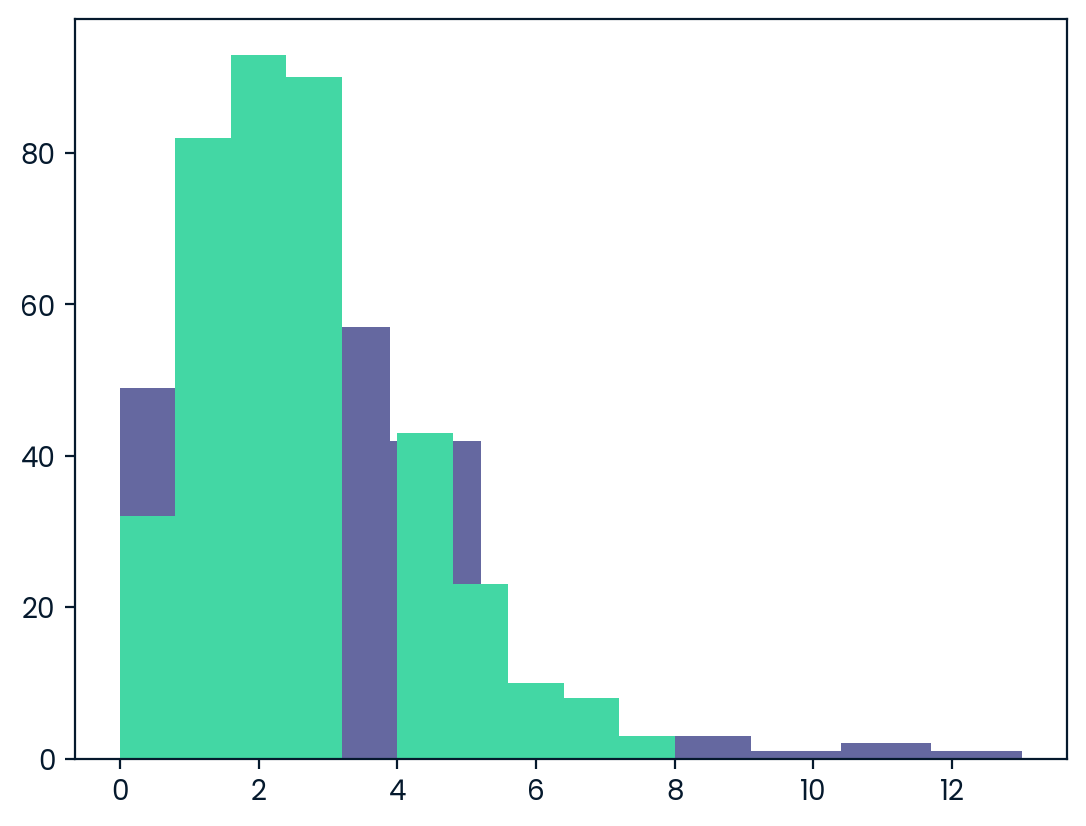

In [68]:
# making a total goals column to check for normal distribution

test_fifa_men['total_goals'] = test_fifa_men['home_score'] + test_fifa_men['away_score']
test_fifa_women['total_goals'] = test_fifa_women['home_score'] + test_fifa_women['away_score']

# plotting to check distribution

plt.hist(data = test_fifa_women, x='total_goals')
plt.hist(data = test_fifa_men, x='total_goals')

# running shapiro-wilk to test for normality because histograms are ambiguous

mens_shapiro = shapiro(test_fifa_men['total_goals'])
womens_shapiro = shapiro(test_fifa_women['total_goals'])

print('mens distribution result: ', mens_shapiro, 'womens distribution result: ', womens_shapiro)

## Wilcoxon-Mann-Whitney U Satats test

In [69]:
# due to a statistically significant shapiro result showing that normality is not met a Wilcoxon-Mann-Whitney U test is most suitable.

# subsetting the columns to x and y

x = test_fifa_women['total_goals']
y = test_fifa_men['total_goals']

# running the test

stats = pingouin.mwu(x, y, alternative='greater')

print(stats)

       U-val alternative     p-val       RBC      CLES
MWU  43273.0     greater  0.005107 -0.126901  0.563451


## Interpreting the results

In [70]:
## Interpreting the results using a conservative alpha value of 0.05 

p_val = stats["p-val"].values[0]

alpha = 0.05
# Determine hypothesis test result using sig. level
if p_val <= alpha:
    result = "reject"
else:
    result = "fail to reject"

result_dict = {"p_val": p_val, "result": result}

print(result_dict)

{'p_val': 0.005106609825443641, 'result': 'reject'}


### Conclusion: 

Due to the p-value being less than our significance value we can reject the null hypothesis and accept the alternative that the mean number of goals scored in women's international soccer matches is greater than men's